In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# Pandas is used for data manipulation
import pandas as pd
import seaborn as sns
# Read in data and display first 5 rows
features = pd.read_csv('heart.csv')
features.head(5)
feature_names=list(features.columns)

In [2]:
print('The shape of our features is:', features.shape)

The shape of our features is: (303, 14)


In [3]:
# Descriptive statistics for each column
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


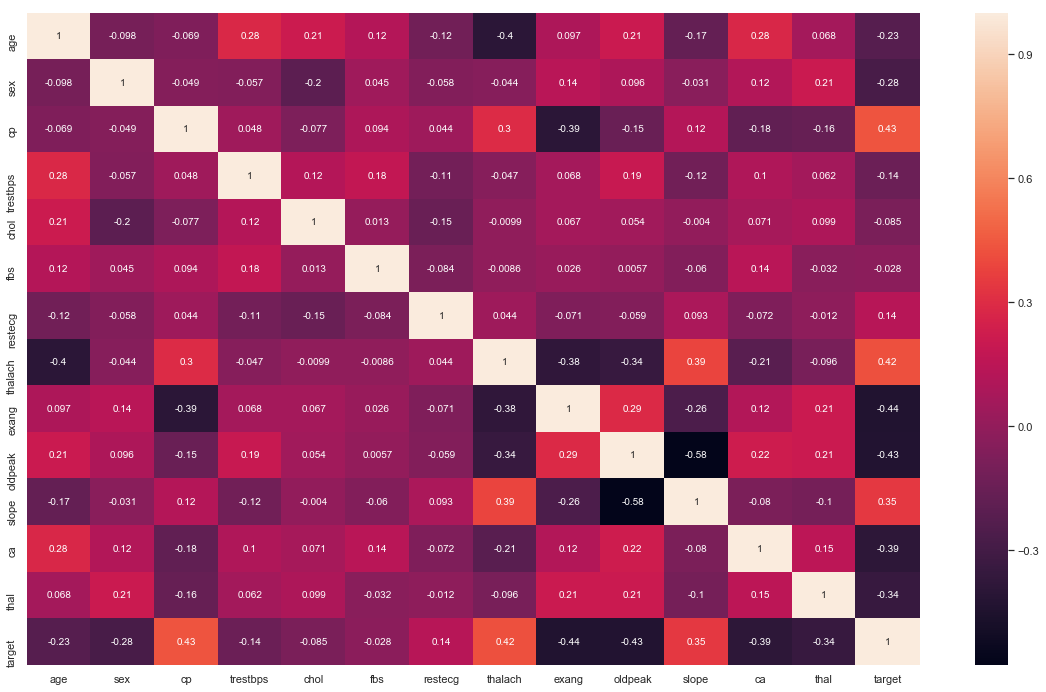

In [4]:

plt.figure(figsize=(20,12)) 
sns.heatmap(features.corr(), annot=True)

In [5]:
#changing to understandable feature names
features.columns = ['age','sex','chest_pain_experienced','resting_blood_pressure','cholesterol','fasting_blood_sugar','Resting_electrocardiographic_measurement',
                  'maximum_heart_rate','exercise_induced_angina','ST_depression','peak_ST_slope','major_vessels_number','thalassemia',
                   'target']

In [6]:
#datatypes
features.dtypes

age                                           int64
sex                                           int64
chest_pain_experienced                        int64
resting_blood_pressure                        int64
cholesterol                                   int64
fasting_blood_sugar                           int64
Resting_electrocardiographic_measurement      int64
maximum_heart_rate                            int64
exercise_induced_angina                       int64
ST_depression                               float64
peak_ST_slope                                 int64
major_vessels_number                          int64
thalassemia                                   int64
target                                        int64
dtype: object

In [7]:
# One-hot encode the data using pandas get_dummies
features_encoded = pd.get_dummies(features,columns=[])
# Display the first 5 rows of the last 12 columns
features_encoded.iloc[:,5:].head(5)

,fasting_blood_sugar,Resting_electrocardiographic_measurement,maximum_heart_rate,exercise_induced_angina,ST_depression,peak_ST_slope,major_vessels_number,thalassemia,target
0,1,0,150,0,2.3,0,0,1,1
1,0,1,187,0,3.5,0,0,2,1
2,0,0,172,0,1.4,2,0,2,1
3,0,1,178,0,0.8,2,0,2,1
4,0,1,163,1,0.6,2,0,2,1


In [8]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['target'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('target', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (227, 13)
Training Labels Shape: (227,)
Testing Features Shape: (76, 13)
Testing Labels Shape: (76,)


In [11]:
# The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))
#print(features)
#validation_features = train_features[]

In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42,max_depth=5)
# Train the model on training data
rf.fit(train_features, train_labels);


In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, train_features, train_labels,cv=10)
for i in range(len(scores)):
    print("score {} : {}".format(i+1,scores[i]))

score 1 : 0.875
score 2 : 0.9166666666666666
score 3 : 0.7916666666666666
score 4 : 0.9130434782608695
score 5 : 0.8181818181818182
score 6 : 0.7272727272727273
score 7 : 0.7727272727272727
score 8 : 0.9090909090909091
score 9 : 0.7727272727272727
score 10 : 0.8636363636363636


In [14]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=1)  
# train_features = pca.fit_transform(train_features) 
# test_features = pca.fit_transform(test_features) 
# pca.explained_variance_ 
#X_test = pca.transform(X_test)

# test_features_str = train_labels.astype('str')
# test_features_str[test_features_str == '0'] = 'no disease'
# test_features_str[test_features_str == '1'] = 'disease'
# test_features_str = test_features_str.values


ValueError: Length of feature_names, 14 does not match number of features, 13

In [ ]:
from sklearn.metrics import mean_squared_error,accuracy_score
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
#Prediction set

prediction_round=np.around(predictions)

error = mean_squared_error(test_labels,prediction_round)
accuracy = accuracy_score(test_labels,prediction_round)
print("Error %f , Accuracy %f"%(error,accuracy))


In [ ]:
from sklearn import metrics
#target_names = ['Heart Disease not present', 'Heart Disease present']
#print(metrics.classification_report(prediction_round, test_labels,target_names=target_names))
print(metrics.classification_report(prediction_round, test_labels))

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_labels, prediction_round)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#import pdb;pdb.set_trace()
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

tempList=[]
for f in range(train_features.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_list[indices[f]], importances[indices[f]]))
    tempList.append(feature_list[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.yticks(range(train_features.shape[1]), tempList)
plt.ylim([-1, train_features.shape[1]])
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42,learning_rate=0.001)

#getting the highest importacne indices and train using them
#important_indices = [i for i in ]
important_indices = [feature_list.index('major_vessels_number'), feature_list.index('chest_pain_experienced'),feature_list.index('ST_depression'),feature_list.index('thalassemia')
                    ]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

adbc.fit(train_important, train_labels)


scores = cross_val_score(adbc, train_important, train_labels,cv=5)
for i in range(len(scores)):
    print("score {} : {}".format(i+1,scores[i]))


adb_predictions = adbc.predict(test_important)
#import pdb;pdb.set_trace()
error = mean_squared_error(test_labels,adb_predictions)
accuracy = accuracy_score(test_labels,adb_predictions)
print("Error %f , Accuracy %f"%(error,accuracy))

In [ ]:
mat = confusion_matrix(test_labels, adb_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#import pdb;pdb.set_trace()
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
print(metrics.classification_report(adb_predictions, test_labels))
